<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/Analyse_von_VAA_Daten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyse von VAA-Daten**

## **Setup**
Zu Beginn laden wir die Pakete, die wir benötigen.

In [2]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Ein paar Dinge definieren

In [6]:
# Parteifarben definieren
partycolors <- c(
  "CDU" = "black",
  "SPD" = "red",
  "FDP" = "yellow",
  "AfD" = "blue",
  "DIE LINKE" = "darkred",
  "Grüne" = "green",
  "Freie Wähler" = "lightblue",
  "Volt" = "#502379")

mainparties <- c("CDU", "SPD", "FDP", "AfD", "FDP", "DIE LINKE", "Grüne", "Freie Wähler", "Volt")

# definieren Sie Ihren eigenen Partyfilter
partyfilter <- c("dieBasis", "BSW")

## Rohdaten laden

In [ ]:
# Datensatz zu Nutzerpositionen (VOTO-Eingabe) herunterladen
download.file(
  url = "https://github.com/cstecker/politicsRLab/blob/main/data/all_voterpos_sample.rds?raw=true",
  destfile = "partypos.rds"
  )

# Datensatz in R einbinden
voterpos <- readRDS("partypos.rds")

glimpse(voterpos)

In [ ]:
# Datensatz zur Nutzerumfrage herunterladen
download.file(
  url = "https://github.com/cstecker/politicsRLab/blob/main/data/all_surveys.rds?raw=true",
  destfile = "survey.rds"
  )

# Datensatz in R einbinden
survey <- readRDS("survey.rds")

glimpse(survey)

In [ ]:
# Datensatz zu Parteipositionen herunterladen
download.file(
  url = "https://github.com/cstecker/politicsRLab/blob/main/data/all_partyposthesen.rds?raw=true",
  destfile = "partypos.rds"
  )

# Datensatz in R einbinden
partypos <- readRDS("partypos.rds")

glimpse(partypos)

## Rohdaten mergen

In [32]:
# wir mergen survey und voterpos
srvy_vtrps <- survey %>%
  left_join(voterpos, by = "voteID")

## Einige Dinge ansehen

In [ ]:
partypos %>%
  count(party, sort = TRUE)

In [ ]:
partypos %>%
  count(gmd_name)

In [ ]:
# Auswählen von bestimmten Thesen
pos_wahlrecht <- partypos %>%
  filter(party %in% mainparties) %>%
  filter(these_title == "Wahlrecht für Nicht-EU-Ausländer")



In [ ]:
pos_wahlrecht %>%
  select(gmd_name, these_title, party, partypos, partypos_str, partyexplain) %>%
  group_by(party) %>%
  summarise(
    mean = mean(partypos),
    max = max(partypos),
    min = min(partypos)
  )

In [ ]:
pos_wahlrecht %>%
  select(gmd_name, these_title, party, partypos, partypos_str, partyexplain) %>%
  ggplot(aes(x = ))

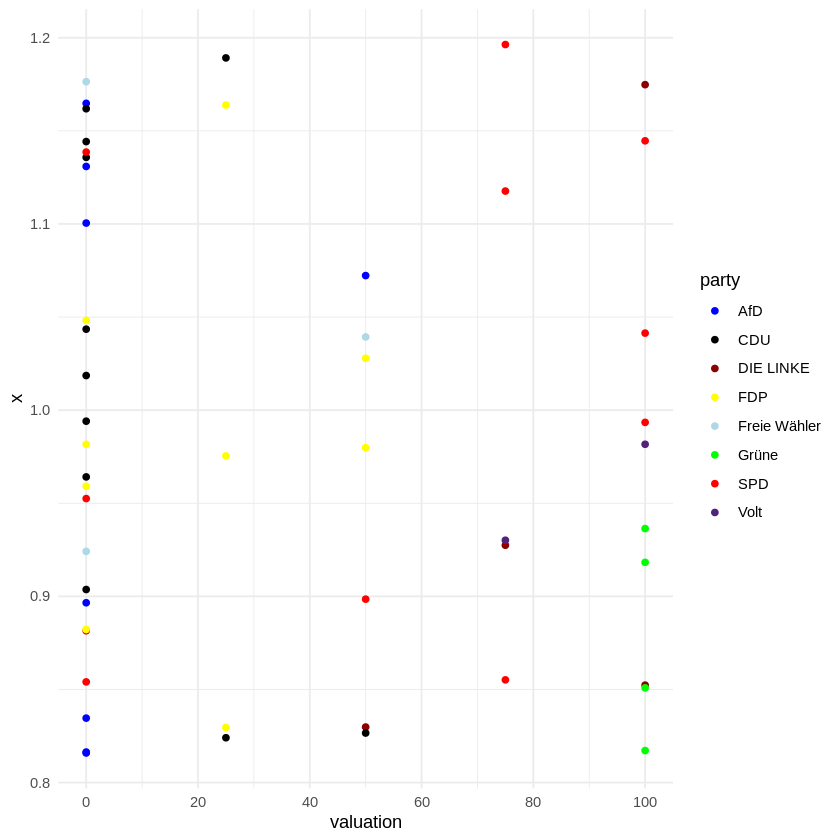

In [ ]:
# Wie stehen die Parteien zum Wahlrecht für Nicht-EU-Ausländer
partypos %>%
  filter(party %in% c("CDU", "SPD", "FDP", "AfD", "DIE LINKE", "Grüne", "Freie Wähler", "Volt")) %>%
  filter(these_title == "Wahlrecht für Nicht-EU-Ausländer") %>%
  ggplot(aes(x = 1, y = valuation, color = party)) +
  geom_jitter(width = .20, height = 0) +
  scale_y_continuous(limits = c(0, 100),
                     breaks = seq(0, 100, 20)) +
  scale_color_manual(
    values = partycolors
  ) +
  coord_flip() +
  theme_minimal()

`summarise()` has grouped output by 'these_title'. You can override using the
`.groups` argument.


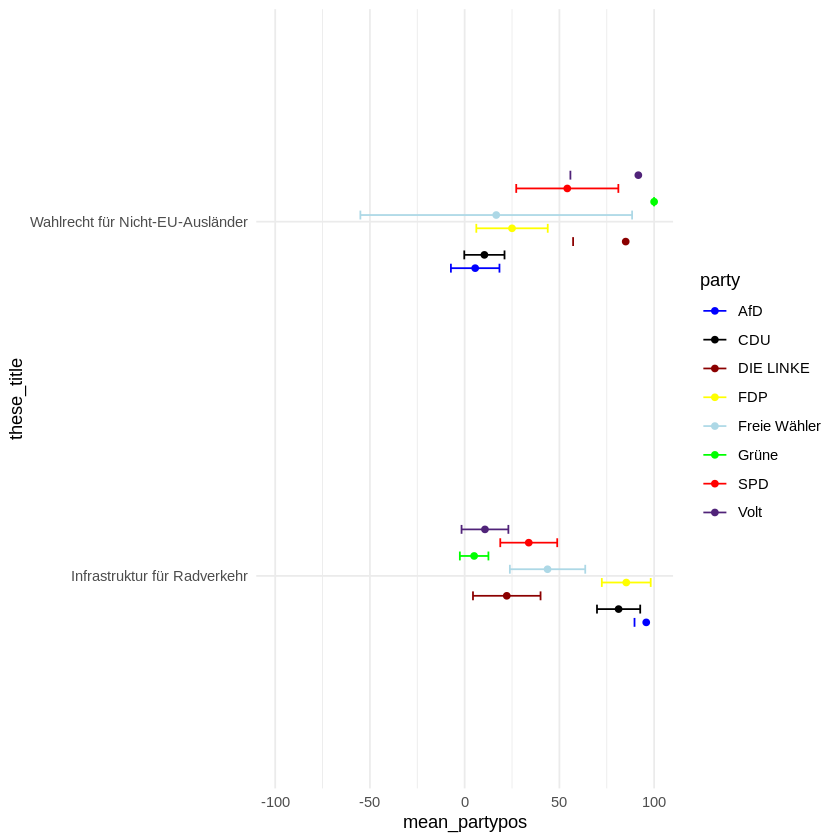

In [30]:
# welche Positionen nehmen Parteien bei bestimmten Thesen ein?

# Thesen filter definieren
which_thesen <- c(
  "Der Ausbau von Radwegen in {location} sollte nicht zu Lasten des Autoverkehrs gehen.",
  "Hier lebende Nicht-EU-Ausländer sollten das Wahlrecht zur Kommunalwahl erhalten."
  )

# Parteienfilter definieren
mainparties <- c("CDU", "SPD", "FDP", "AfD", "FDP", "DIE LINKE", "Grüne", "Freie Wähler", "Volt")

partypos %>%
  # filter thesen
  filter(these %in% which_thesen) %>%
  # filter parteien
  filter(party %in% mainparties) %>%
  # filter bestimmte Gemeinden - ggf. auskommentieren
  #filter(gmd_name %in% c("Halle", "Dresden", "Magdeburg", "Jena", "Mannheim")) %>%
  group_by(these_title, party) %>%
  summarise(
    mean_partypos = mean(partypos, na.rm = TRUE),
    ci_lower = mean_partypos - qt(0.975, df = n() - 1) * (sd(partypos, na.rm = TRUE) / sqrt(n())),
    ci_upper = mean_partypos + qt(0.975, df = n() - 1) * (sd(partypos, na.rm = TRUE) / sqrt(n()))
  ) %>%
  ggplot(aes(x = these_title, y = mean_partypos, color = party)) +
  geom_point(position = position_dodge(width = .3)) +
  geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), width = 0.2, position = position_dodge(width = .3)) +
  scale_y_continuous(limits = c(-100, 100)) +
  scale_color_manual(values = partycolors) +
  coord_flip() +
  theme_minimal()